<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ULckdresearch2023/data.csv")
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,...,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold,TimeDiff
0,1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:55,63.60,0,...,5.284,215.0,81.0,123.0,99.0,21.019,1,0,1,0.000000
1,3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:50,70.20,0,...,5.755,219.0,64.0,146.0,73.0,15.198,1,1,1,1.131507
2,2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24,64.02,0,...,5.300,193.0,62.0,129.0,65.0,30.879,1,0,1,1.191781
3,0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42,48.54,0,...,5.562,205.0,69.0,139.0,76.0,36.916,1,0,1,1.016438
4,4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:55,80.47,0,...,5.500,198.0,74.0,129.0,60.0,28.684,1,1,1,1.208219


In [ ]:
data = ['Slopes', 'eGFR_t1','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data = df[data]

feature scaling (ให้มีค่าอยู่ระหว่าง 0-1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols = data.columns
ms = MinMaxScaler()
data = ms.fit_transform(data)
data = pd.DataFrame(data, columns=[cols])

In [ ]:
data.describe()

,Slopes,eGFR_t1,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.00000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.413315,0.366446,0.150568,0.581105,0.353356,0.328410,0.570213,0.543272,0.02435,0.075168,...,0.568475,0.210466,0.223322,0.084826,0.229028,0.175434,0.142607,0.351101,0.182648,0.176909
std,0.052640,0.117914,0.124334,0.138650,0.095345,0.082076,0.105812,0.123241,0.07428,0.107584,...,0.074932,0.079444,0.077557,0.051841,0.127199,0.048737,0.086660,0.119838,0.072224,0.116325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390658,0.300212,0.000000,0.500000,0.293657,0.270000,0.504587,0.471429,0.00000,0.000000,...,0.526866,0.161955,0.176836,0.055848,0.145455,0.147129,0.089064,0.272414,0.136364,0.079804
50%,0.415804,0.376836,0.190217,0.583333,0.348412,0.325000,0.568807,0.542857,0.00000,0.000000,...,0.574000,0.199703,0.217166,0.067439,0.185909,0.172309,0.116029,0.344828,0.170455,0.153156
75%,0.438370,0.437288,0.217391,0.678571,0.403028,0.385000,0.633028,0.614286,0.00000,0.175000,...,0.620328,0.242583,0.262668,0.096315,0.272727,0.196977,0.175227,0.406897,0.226023,0.252421
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


แบ่งกลุ่มข้อมูลโดย
- จัดกลุ่มเกี่ยวกับ **stage** มีจำนวน 4-5-6 กลุ่ม **นำตัวเเปรออก** 'eGFR_t1', 'L1-eGFR'
- จัดกลุ่มเกี่ยวกับ **slope** มีจำนวน 2-3-4 กลุ่ม **นำตัวเเปรออก**  'Slopes','eGFR_t1','TimeDiff','L1-eGFR'


#K-means

##Stage

In [ ]:
stage = ['Slopes','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
  'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
stage = data[stage]

In [ ]:
from sklearn.cluster import KMeans
stage_k4 = stage.copy()
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(stage_k4)
stage_k4['Cluster4_stage']=kmeans.labels_
stage_k4.head()

,Slopes,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster4_stage
0,0.386475,0.000000,0.654762,0.252676,0.195,0.587156,0.478571,0.246575,0.000,0.000,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,1
1,0.454843,0.204051,0.666667,0.238841,0.190,0.486239,0.321429,0.246575,0.225,0.000,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,1
2,0.392365,0.214921,0.678571,0.250587,0.190,0.596330,0.557143,0.273973,0.250,0.170,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,3
3,0.356062,0.183300,0.690476,0.238841,0.180,0.504587,0.528571,0.095890,0.000,0.005,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,1
4,0.577153,0.217885,0.714286,0.206996,0.165,0.422018,0.307143,0.273973,0.000,0.075,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,3


In [ ]:
stage_k5 = stage.copy()
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(stage_k5)
stage_k5['Cluster5_stage']=kmeans.labels_
stage_k5.head()

,Slopes,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster5_stage
0,0.386475,0.000000,0.654762,0.252676,0.195,0.587156,0.478571,0.246575,0.000,0.000,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,3
1,0.454843,0.204051,0.666667,0.238841,0.190,0.486239,0.321429,0.246575,0.225,0.000,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,3
2,0.392365,0.214921,0.678571,0.250587,0.190,0.596330,0.557143,0.273973,0.250,0.170,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,3
3,0.356062,0.183300,0.690476,0.238841,0.180,0.504587,0.528571,0.095890,0.000,0.005,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,3
4,0.577153,0.217885,0.714286,0.206996,0.165,0.422018,0.307143,0.273973,0.000,0.075,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,3


In [ ]:
stage_k6 = stage.copy()
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(stage_k6)
stage_k6['Cluster6_stage']=kmeans.labels_
stage_k6.head()

,Slopes,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster6_stage
0,0.386475,0.000000,0.654762,0.252676,0.195,0.587156,0.478571,0.246575,0.000,0.000,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,3
1,0.454843,0.204051,0.666667,0.238841,0.190,0.486239,0.321429,0.246575,0.225,0.000,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,3
2,0.392365,0.214921,0.678571,0.250587,0.190,0.596330,0.557143,0.273973,0.250,0.170,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,3
3,0.356062,0.183300,0.690476,0.238841,0.180,0.504587,0.528571,0.095890,0.000,0.005,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,3
4,0.577153,0.217885,0.714286,0.206996,0.165,0.422018,0.307143,0.273973,0.000,0.075,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,3


##slope

In [ ]:
slope = [ 'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
  'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
slope = data[slope]

In [ ]:
from sklearn.cluster import KMeans
slope_k2 = slope.copy()
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(slope_k2)
slope_k2 ['Cluster2_slopes']=kmeans.labels_
slope_k2.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster2_slopes
0,0.654762,0.252676,0.195,0.587156,0.478571,0.246575,0.000,0.000,0.000000,0.0,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,0
1,0.666667,0.238841,0.190,0.486239,0.321429,0.246575,0.225,0.000,0.000000,0.0,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,0
2,0.678571,0.250587,0.190,0.596330,0.557143,0.273973,0.250,0.170,0.000000,0.0,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,0
3,0.690476,0.238841,0.180,0.504587,0.528571,0.095890,0.000,0.005,0.138889,0.0,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,0
4,0.714286,0.206996,0.165,0.422018,0.307143,0.273973,0.000,0.075,0.000000,0.0,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,0


In [ ]:
slope_k3 = slope.copy()
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(slope_k3)
slope_k3 ['Cluster3_slopes']=kmeans.labels_
slope_k3.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster3_slopes
0,0.654762,0.252676,0.195,0.587156,0.478571,0.246575,0.000,0.000,0.000000,0.0,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,1
1,0.666667,0.238841,0.190,0.486239,0.321429,0.246575,0.225,0.000,0.000000,0.0,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,1
2,0.678571,0.250587,0.190,0.596330,0.557143,0.273973,0.250,0.170,0.000000,0.0,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,1
3,0.690476,0.238841,0.180,0.504587,0.528571,0.095890,0.000,0.005,0.138889,0.0,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,1
4,0.714286,0.206996,0.165,0.422018,0.307143,0.273973,0.000,0.075,0.000000,0.0,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,1


In [ ]:
slope_k4 = slope.copy()
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(slope_k4)
slope_k4 ['Cluster4_slopes']=kmeans.labels_
slope_k4.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster4_slopes
0,0.654762,0.252676,0.195,0.587156,0.478571,0.246575,0.000,0.000,0.000000,0.0,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,3
1,0.666667,0.238841,0.190,0.486239,0.321429,0.246575,0.225,0.000,0.000000,0.0,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,3
2,0.678571,0.250587,0.190,0.596330,0.557143,0.273973,0.250,0.170,0.000000,0.0,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,1
3,0.690476,0.238841,0.180,0.504587,0.528571,0.095890,0.000,0.005,0.138889,0.0,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,1
4,0.714286,0.206996,0.165,0.422018,0.307143,0.273973,0.000,0.075,0.000000,0.0,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,1


# t-SNE
t-SNE ทำงานอย่างไร? : อัลกอริธึมการลดขนาดแบบไม่เชิงเส้นจะค้นหารูปแบบในข้อมูลตามความคล้ายคลึงกันของจุดข้อมูลพร้อมฟีเจอร์

https://www.geeksforgeeks.org/ml-t-distributed-stochastic-neighbor-embedding-t-sne-algorithm/

In [ ]:
# Importing Necessary Modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

 t-SNE เป็นอัลกอริธึมที่ซับซ้อนซึ่งใช้วิธีการที่ไม่เชิงเส้นที่ซับซ้อนบางอย่างเพื่อแมปข้อมูลมิติสูงในมิติที่ต่ำกว่า

##Slope

In [ ]:
# Separate the features and target variable
y = slope_k2['Cluster2_slopes']
X = slope_k2.drop(['Cluster2_slopes'], axis=1)

# Standardize the features
#standardized_data = StandardScaler().fit_transform(X)

<ipython-input-16-b937c8de313c>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = slope_k2.drop(['Cluster2_slopes'], axis=1)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=40, random_state=42) #ค่า KL Divergence  ค่าต่ำดี
X_tsne_s1 = tsne.fit_transform(X)
tsne.kl_divergence_

3.0183348655700684

[Text(0.5, 1.0, 'Cluster2_slopes T-SNE projection')]

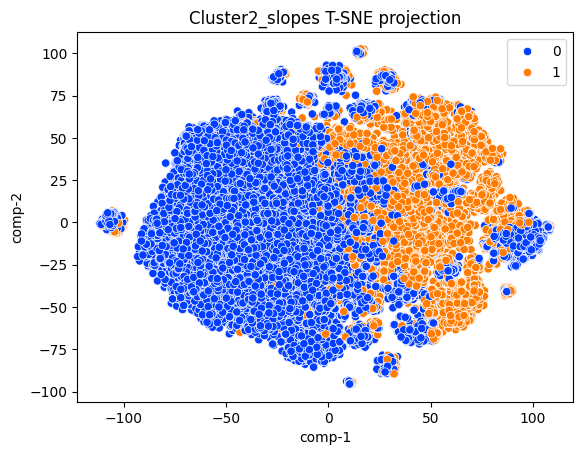

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming you have already defined y and tsne_data

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne_s1[:,0]
df["comp-2"] = X_tsne_s1[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 2),
                data=df).set(title="Cluster2_slopes T-SNE projection")

In [ ]:
# Separate the features and target variable
y = slope_k3['Cluster3_slopes']
X = slope_k3.drop(['Cluster3_slopes'], axis=1)

<ipython-input-25-ae4396a1646b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = slope_k3.drop(['Cluster3_slopes'], axis=1)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,perplexity=40, random_state=42)
X_tsne_s2 = tsne.fit_transform(X)
tsne.kl_divergence_

2.665461778640747

[Text(0.5, 1.0, 'Cluster3_slopes T-SNE projection')]

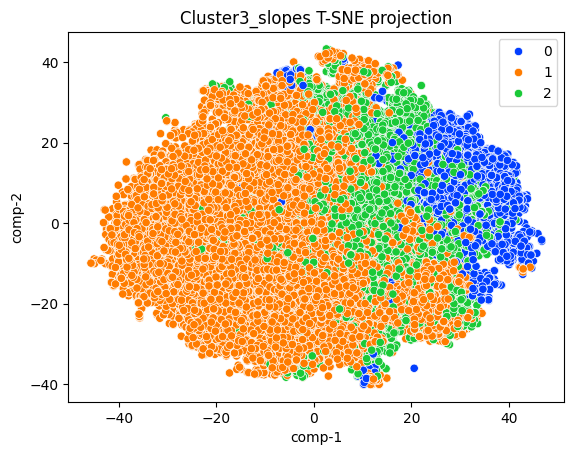

[Text(0.5, 1.0, 'Cluster3_slopes T-SNE projection')]

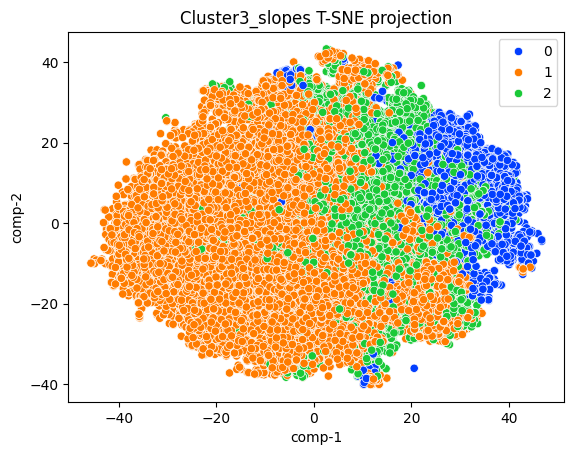

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming you have already defined y and tsne_data

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne_s2[:,0]
df["comp-2"] = X_tsne_s2[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 3),
                data=df).set(title="Cluster3_slopes T-SNE projection")

In [ ]:
# Separate the features and target variable
y = slope_k4['Cluster4_slopes']
X = slope_k4.drop(['Cluster4_slopes'], axis=1)
standardized_data_2 = StandardScaler().fit_transform(X)

<ipython-input-29-848b12895832>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = slope_k4.drop(['Cluster4_slopes'], axis=1)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,perplexity=40, random_state=42)
X_tsne_s3 = tsne.fit_transform(X)
tsne.kl_divergence_

2.665461778640747

[Text(0.5, 1.0, 'Cluster4_slopes T-SNE projection')]

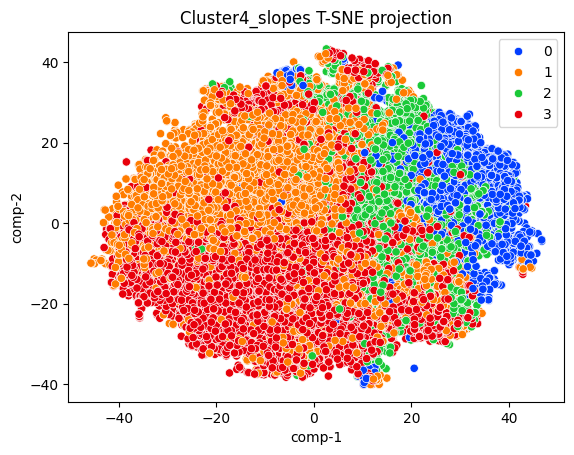

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming you have already defined y and tsne_data

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne_s3[:,0]
df["comp-2"] = X_tsne_s3[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 4),
                data=df).set(title="Cluster4_slopes T-SNE projection")

##Stage

In [ ]:
# Separate the features and target variable
y = stage_k4['Cluster4_stage']
X = stage_k4.drop(['Cluster4_stage'], axis=1)

standardized_data_3 = StandardScaler().fit_transform(X)

<ipython-input-32-e0ca77e12674>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = stage_k4.drop(['Cluster4_stage'], axis=1)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,perplexity=40, random_state=42)
X_tsne_S4 = tsne.fit_transform(X)
tsne.kl_divergence_

2.7332425117492676

[Text(0.5, 1.0, 'Cluster4_stage T-SNE projection')]

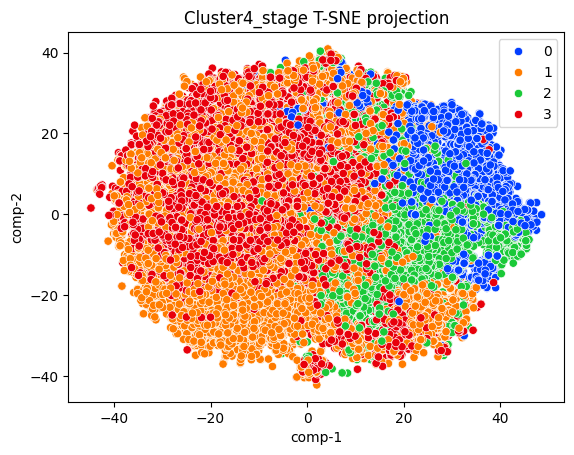

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming you have already defined y and tsne_data

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne_S4[:,0]
df["comp-2"] = X_tsne_S4[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 4),
                data=df).set(title="Cluster4_stage T-SNE projection")

In [ ]:
# Separate the features and target variable
y = stage_k5['Cluster5_stage']
X = stage_k5.drop(['Cluster5_stage'], axis=1)

standardized_data_4 = StandardScaler().fit_transform(X)

<ipython-input-15-4469ea8ae971>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = stage_k5.drop(['Cluster5_stage'], axis=1)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,perplexity=40, random_state=42)
X_tsne_S5 = tsne.fit_transform(X)
tsne.kl_divergence_

2.7332425117492676

[Text(0.5, 1.0, 'Cluster5_stage T-SNE projection')]

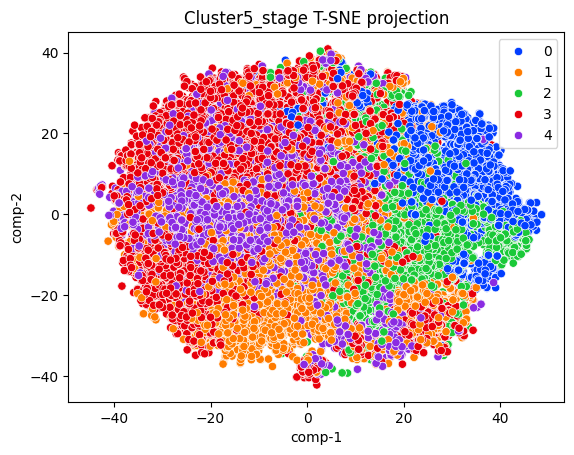

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming you have already defined y and tsne_data

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne_S5[:,0]
df["comp-2"] = X_tsne_S5[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 5),
                data=df).set(title="Cluster5_stage T-SNE projection")

In [ ]:
# Separate the features and target variable
y = stage_k6['Cluster6_stage']
X = stage_k6.drop(['Cluster6_stage'], axis=1)

<ipython-input-19-e155a4b67e40>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = stage_k6.drop(['Cluster6_stage'], axis=1)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,perplexity=40, random_state=42)
X_tsne_S6 = tsne.fit_transform(X)
tsne.kl_divergence_

2.7332425117492676

[Text(0.5, 1.0, 'Cluster6_stage T-SNE projection')]

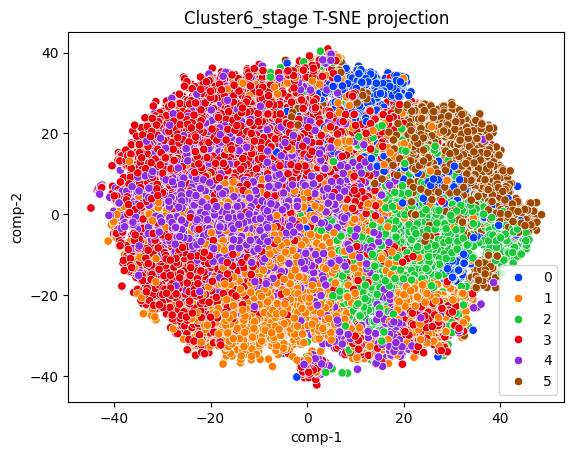

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming you have already defined y and tsne_data

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne_S6[:,0]
df["comp-2"] = X_tsne_S6[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 6),
                data=df).set(title="Cluster6_stage T-SNE projection")